In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy
import matplotlib.pyplot as plt
import pyregion
from tqdm import tqdm
from astropy.table import QTable
import warnings
import numpy as np
import imageio.v3 as iio
warnings.filterwarnings("ignore")

plt.style.use('paper')

In [4]:
# LOAD MAPS 

inputfile_rgb_fits = './data/cutout-IPAC_P_GLIMPSE360.fits'
inputfile_rgb_png = './data/cutout-IPAC_P_GLIMPSE360.jpg'
hdu_rgb = fits.open(inputfile_rgb_fits)[0]
hdu_rgb.data = hdu_rgb.data[0]
hdu_rgb.header['NAXIS'] = 2
del hdu_rgb.header['*3*']
del hdu_rgb.header['*4*']

hdr_rgb = hdu_rgb.header.copy()

file_rgb = './data/ssc2006-02a1.jpg'

data_rgb = iio.imread(file_rgb)
data_rgb = data_rgb[:,:,2]
data_rgb = data_rgb[::-1]

# print(data_rgb.shape)

hdr_rgb['CRPIX1'] = data_rgb.shape[1]/2
hdr_rgb['CRPIX2'] = data_rgb.shape[0]/2

hdr_rgb['CRVAL1'] = 0 - 0.031
hdr_rgb['CRVAL2'] = 0 + 0.003

l1 = 0.9359
l2 = 358.991 - 360
b1 = -0.69619
b2 = 0.7

w, h = l1 - l2, b2 - b1

hdr_rgb['CDELT1'] = -w/data_rgb.shape[1]
hdr_rgb['CDELT2'] = h/data_rgb.shape[0]

hdu_rgb_new = fits.PrimaryHDU(data=data_rgb, header=hdr_rgb)
hdu_rgb_new.writeto(file_rgb.replace('jpg', 'fits'), overwrite=True)

In [7]:
hdu_mom1 = fits.open('./data_aces/HC3N_CubeMosaic_downsampled9_spectrally.fits.moment.maximum_coord')[0]
hdu_max = fits.open('./data_aces/HC3N_CubeMosaic_downsampled9_spectrally.fits.moment.maximum')[0]

In [12]:
# Wide
l = 0
b = 0
width = 1.8
height = 1

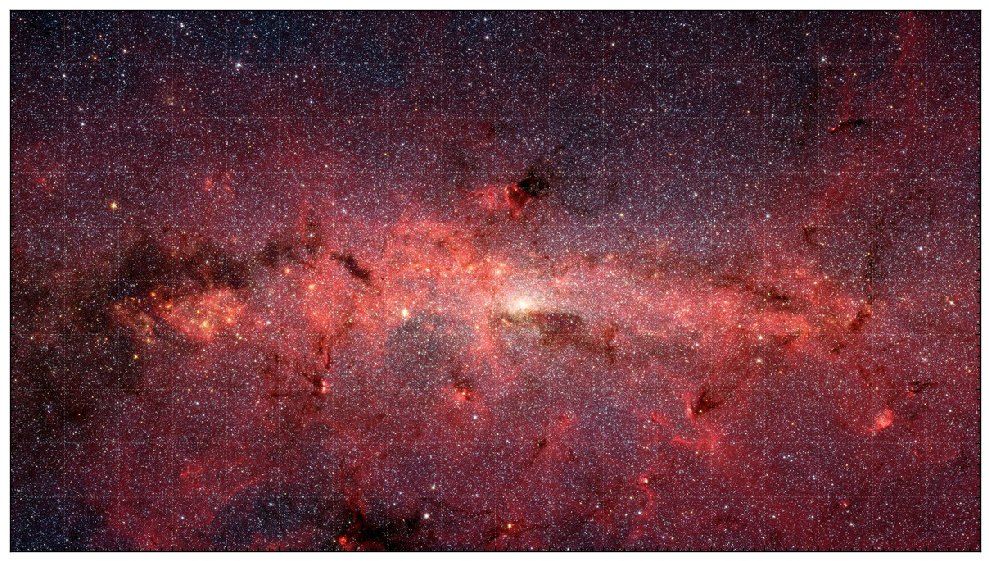

In [13]:
fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_rgb_new, figure=fig, subplot=(1,1,1))
ax.show_rgb(file_rgb)

ax.recenter(l, b, width=width, height=height)

ax.ticks.set_xspacing(0.1)
ax.ticks.set_yspacing(0.1)

ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('white')

for i, ax in enumerate(fig.get_axes()):
    axes = fig.get_axes()
    ra_ = axes[i].coords[0]
    dec_ = axes[i].coords[1]
    dec_.ticklabels.set_rotation(90)
    axes[i].grid(True, alpha=0.25, ls=':', color='white')

fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(wspace=0, hspace=0)

fig.tight_layout()
# fig.savefig('./rgb2.png', dpi=150, bbox_inches='tight', transparent=True)
# fig.savefig('./fig_rgb.pdf', dpi=250, bbox_inches='tight', transparent=True)